In [152]:
import sys
import os

# Adiciona o diretório src ao sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importa os módulos
from process_tiffs import save_masked_tiff, extract_classification_info, plot_tiff_with_classes

In [153]:
import pandas as pd
import numpy as np
import glob
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.spatial import Voronoi
from shapely.geometry import Polygon
import seaborn as sns
from shapely.geometry import Point

# Temperatura ao decorrer dos anos

In [158]:
path = '../dados/estacoes'  
all_files = glob.glob(path + "/*.csv")  

In [159]:
all_data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    all_data.append(df)

combined_data = pd.concat(all_data, axis=0, ignore_index=True)

In [160]:
combined_data.head()

,mes,hora,precipitacao_total,pressao_atm_hora,pressao_atm_max,pressao_atm_min,radiacao_global,temperatura_bulbo_hora,temperatura_orvalho_hora,temperatura_max,...,temperatura_orvalho_min,umidade_rel_max,umidade_rel_min,umidade_rel_hora,vento_direcao,vento_rajada_max,vento_velocidade,data,id_estacao,ano
0,6,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.770016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-09,A305,2003
1,6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.765882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-24,A305,2003
2,6,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.936176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-26,A305,2003
3,6,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.956425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-29,A305,2003
4,6,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.956425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-06-29,A305,2003


In [68]:
combined_data['id_estacao'].unique()

array(['A305', 'A306', 'A307', 'A308', 'A408', 'A412', 'A310', 'A309',
       'A313', 'A526', 'A539', 'A543', 'A314', 'A315', 'A316', 'A317',
       'A318', 'A319', 'A321', 'A322', 'A323', 'A324', 'A325', 'A327',
       'A329', 'A330', 'A331', 'A332', 'A333', 'A334', 'A336', 'A337',
       'A339', 'A340', 'A413', 'A415', 'A416', 'A417', 'A418', 'A419',
       'A420', 'A423', 'A424', 'A425', 'A426', 'A428', 'A429', 'A430',
       'A432', 'A433', 'A435', 'A436', 'A439', 'A440', 'A441', 'A442',
       'A443', 'A342', 'A349', 'A343', 'A328', 'A345', 'A347', 'A348',
       'A350', 'A351', 'A354', 'A358', 'A359', 'A360', 'A365', 'A366',
       'A367', 'A448', 'A450', 'A559', 'A563', 'A449', 'A454', 'A451',
       'A453', 'A370', 'A371', 'A372', 'A373', 'A368', 'A369', 'A458'],
      dtype=object)

In [69]:
# Novo dataset com as colunas de interesse
temperaturas = combined_data[['data', 'temperatura_max', 'temperatura_min', 'ano']]

# Agrupar por ano
temperatura_anual = temperaturas.groupby('ano').agg({
    'temperatura_max': 'max',
    'temperatura_min': 'min'
}).reset_index()

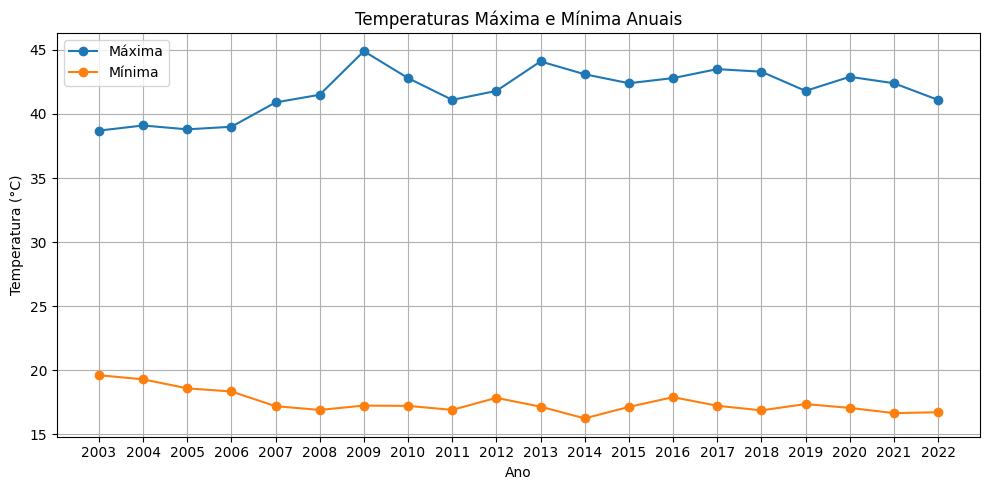

In [41]:
# Visualizar a série temporal
# Criando o gráfico
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_max'], label='Máxima', marker='o')
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_min'], label='Mínima', marker='o')

plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Anuais')
plt.xticks(range(2003, 2023))  # Define os ticks do eixo x para cada ano de 2003 a 2022
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta automaticamente os subplots para dar espaço ao conteúdo
plt.show()

# Segmentações ao decorrer dos anos

In [ ]:
# Diretório onde os arquivos serão salvos
save_dir = '../dados/segmentacoes'

# Lista de anos
years = range(2003, 2022)  

# Loop para baixar os arquivos
for year in years:
    # Construindo a URL para o ano atual
    url = f'https://storage.googleapis.com/mapbiomas-public/initiatives/brasil/collection_8/lclu/coverage/brasil_coverage_{year}.tif'
    
    # Nome do arquivo local onde o TIF será salvo
    local_filename = f'{save_dir}brasil_coverage_{year}.tif'

    # Fazendo a requisição para baixar o arquivo
    response = requests.get(url)
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Garantindo que o diretório exista
        os.makedirs(save_dir, exist_ok=True)
        
        # Escrevendo o conteúdo do arquivo baixado no arquivo local
        with open(local_filename, 'wb') as file:
            file.write(response.content)
        print(f'Arquivo {local_filename} baixado e salvo com sucesso.')
    else:
        print(f'Falha ao baixar o arquivo para o ano {year}.')

Arquivo ../dados/segmentacoesbrasil_coverage_2000.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2001.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2002.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2003.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2004.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2005.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2006.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2007.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2008.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2009.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2010.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2011.tif baixado e salvo com sucesso.
Arqu

## Agora precisamos delimitar pelas estações na região da caatinga

In [ ]:
import basedosdados as bd

In [290]:
# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Para carregar o dado direto no pandas
df_estacoes = bd.read_table(dataset_id='br_inmet_bdmep',
table_id='estacao',
billing_project_id="projetopdi-430718")

# Convertendo o DataFrame em GeoDataFrame
gdf_estacoes = gpd.GeoDataFrame(
    df_estacoes, 
    geometry=gpd.points_from_xy(df_estacoes['longitude'], df_estacoes['latitude']),
    crs="EPSG:4674"
)

# Reprojetar o GeoDataFrame das estações para o mesmo CRS que o shapefile dos biomas
gdf_estacoes = gdf_estacoes.to_crs(caatinga.crs)

# Filtrar as estações que estão dentro da Caatinga
stations_within_caatinga = gdf_estacoes[gdf_estacoes.geometry.within(caatinga.unary_union)]

# Dropar colunas que não serão utilizadas
stations_within_caatinga = stations_within_caatinga.drop(columns=['id_municipio', 'estacao','data_fundacao','altitude'])

Downloading: 100%|██████████| 612/612 [00:00<00:00, 1174.66rows/s]


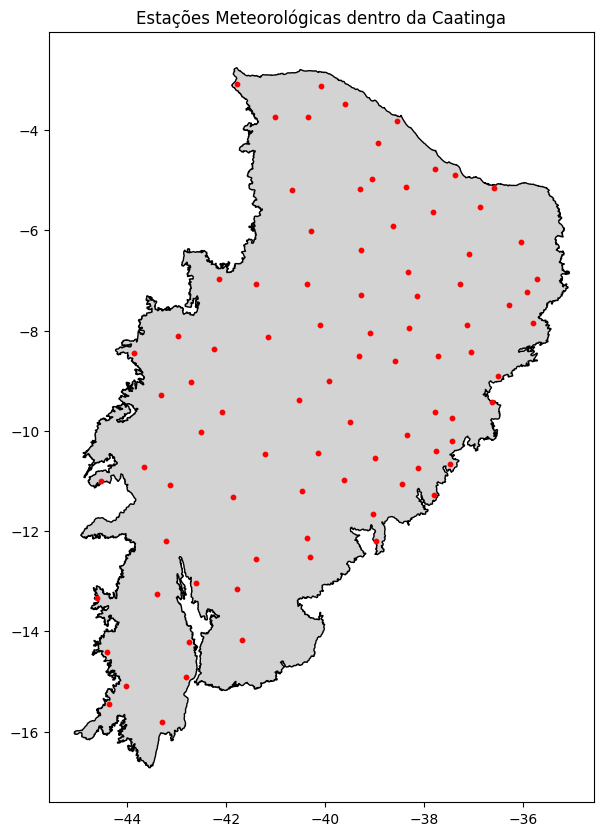

In [291]:
# Plotar um mapa com as estações
fig, ax = plt.subplots(figsize=(10, 10))
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')
stations_within_caatinga.plot(ax=ax, color='red', markersize=10)
plt.title('Estações Meteorológicas dentro da Caatinga')
plt.show()

Precisamos dividir o mapa de acordo com as estações

In [292]:
# Filtrar as estações que estão dentro da Caatinga
stations_within_caatinga = gdf_estacoes[gdf_estacoes.geometry.within(caatinga.unary_union)]

# Extrair as coordenadas das estações
coords = np.array(list(zip(stations_within_caatinga.geometry.x, stations_within_caatinga.geometry.y)))

# Adicionar pontos fictícios ao redor do perímetro da Caatinga
minx, miny, maxx, maxy = caatinga.total_bounds
padding = 0.5  # Ajuste conforme necessário
extra_points = [
    [minx - padding, miny - padding],
    [minx - padding, maxy + padding],
    [maxx + padding, miny - padding],
    [maxx + padding, maxy + padding]
]

# Adicionar os novos pontos às coordenadas das estações
all_points = np.vstack([coords, extra_points])

# Gerar os polígonos de Voronoi com os pontos adicionais
vor = Voronoi(all_points)

# Criar polígonos de Voronoi a partir dos vértices
polygons = []
for region in vor.regions:
    if not -1 in region and region:
        polygon = Polygon([vor.vertices[i] for i in region])
        polygons.append(polygon)

# Criar um GeoDataFrame com os polígonos de Voronoi
gdf_voronoi = gpd.GeoDataFrame(geometry=polygons, crs=stations_within_caatinga.crs)

# Verificar e corrigir geometrias inválidas antes do clipping
gdf_voronoi['geometry'] = gdf_voronoi['geometry'].buffer(0)

# Clipping com o polígono da Caatinga para garantir que todos os polígonos estejam dentro da região
gdf_voronoi_clipped = gpd.GeoDataFrame(
    geometry=[poly.intersection(caatinga.unary_union) for poly in gdf_voronoi.geometry if not poly.is_empty],
    crs=gdf_voronoi.crs
)

# Remover geometrias vazias
gdf_voronoi_clipped = gdf_voronoi_clipped[~gdf_voronoi_clipped.is_empty]

In [293]:
# Associar o polígono ao ID da estação mais próxima
def find_nearest_station(polygon, stations):
    centroid = polygon.centroid
    distances = stations.geometry.apply(lambda x: centroid.distance(x))
    nearest_station = stations.loc[distances.idxmin()]
    return nearest_station['id_estacao'],nearest_station.geometry.y, nearest_station.geometry.x

# Aplicar a função para encontrar o ID da estação, latitude e longitude
gdf_voronoi_clipped[['id_estacao', 'latitude', 'longitude']] = gdf_voronoi_clipped.geometry.apply(
    lambda poly: find_nearest_station(poly, stations_within_caatinga)
).apply(pd.Series)

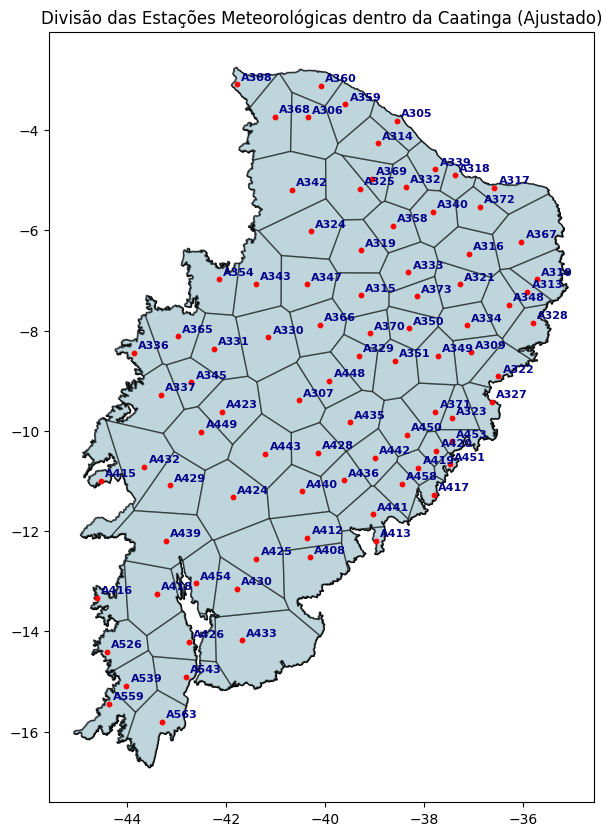

In [294]:
# Plotar o resultado ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi
gdf_voronoi_clipped.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar as estações meteorológicas
stations_within_caatinga.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID das estações no plot
for x, y, label in zip(stations_within_caatinga.geometry.x, stations_within_caatinga.geometry.y, stations_within_caatinga['id_estacao']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão das Estações Meteorológicas dentro da Caatinga (Ajustado)')
plt.show()

In [295]:
# Salvar o shapefile resultante
gdf_voronoi_clipped.to_file('../dados/shapefile_estacoes_divididas/estacoes_territorios_dividido.shp')
gdf_voronoi_clipped.head()

,geometry,id_estacao,latitude,longitude
0,"MULTIPOLYGON (((-43.28134 -8.66269, -43.66635 ...",A336,-8.441667,-43.865556
1,"MULTIPOLYGON (((-43.28134 -8.66269, -43.63515 ...",A365,-8.117939,-42.975721
2,"MULTIPOLYGON (((-44.05675 -12.61621, -44.05717...",A416,-13.332500,-44.617500
3,"POLYGON ((-42.21703 -13.71785, -42.21693 -13.7...",A433,-14.181944,-41.672222
4,"POLYGON ((-41.52190 -3.55804, -41.52253 -3.558...",A308,-3.086667,-41.783056


# Separar os arquivos geotif por estação

In [19]:
def process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped):
    """
    Processa todos os arquivos GeoTIFF na pasta segmentacoes para todas as estações,
    salvando os resultados em pastas separadas por ano.

    Args:
    segmentacoes_dir (str): Caminho para a pasta contendo os arquivos GeoTIFF de entrada.
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes serão salvos.
    gdf_voronoi_clipped (GeoDataFrame): GeoDataFrame contendo os polígonos de Voronoi.
    """

    # Listar todos os arquivos GeoTIFF na pasta segmentacoes
    tiff_files = glob.glob(os.path.join(segmentacoes_dir, '*.tif'))

    # Obter os IDs únicos das estações
    estacao_ids = gdf_voronoi_clipped['id_estacao'].unique()

    for tiff_file in tiff_files:
        # Extrair o ano do nome do arquivo GeoTIFF
        year = os.path.basename(tiff_file).split('_')[-1].split('.')[0]

        # Criar diretório para o ano se não existir
        year_dir = os.path.join(output_base_dir, year)
        os.makedirs(year_dir, exist_ok=True)

        for estacao_id in estacao_ids:
            # Aplicar a função para salvar o TIFF mascarado
            save_masked_tiff(tiff_file, estacao_id, year_dir, gdf_voronoi_clipped)
            print(f"Salvo: {year_dir}/coverage_{estacao_id}_{year}.tif")


# Definir caminhos
segmentacoes_dir = '../dados/segmentacoes'
output_base_dir = '../dados/raster_tiff_caating'

# Executar o processamento para todos os arquivos e estações
process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped)

Salvo: ../dados/raster_tiff_caating\2003/coverage_A336_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A365_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A416_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A433_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A308_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A368_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A539_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A543_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A526_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A559_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A563_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A454_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A418_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A426_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A430_2003.tif
Salvo: ../dados/raster_tiff_caating\2003

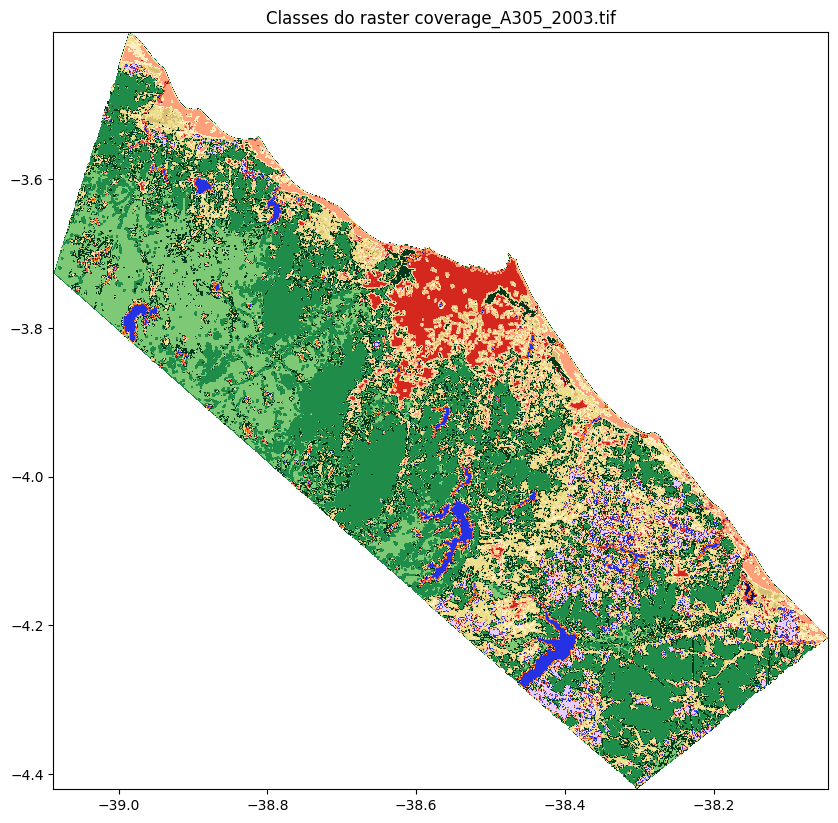

In [20]:
output_tif_path = '../dados/raster_tiff_caating/2003/coverage_A305_2003.tif'
plot_tiff_with_classes(output_tif_path)

In [21]:
# Extrair informações do GeoTIFF salvo
sorted_class_counts = extract_classification_info(output_tif_path)

# Exibir as classificações e contagens
print("Contagem de superpixels por classe (ordenado):", sorted_class_counts)

Contagem de superpixels por classe (ordenado): {31: 2574, 32: 4683, 5: 24970, 41: 34098, 25: 47489, 12: 66877, 15: 120126, 23: 140382, 48: 149318, 33: 253628, 24: 451289, 21: 884053, 4: 1389258, 3: 1874707, 0: 9162207}


## Série temporal das estações

In [161]:
# Novo dataset com as colunas de interesse
temperaturas = combined_data[['id_estacao','data', 'temperatura_max', 'temperatura_min', 'ano']]
temperaturas.head()

,id_estacao,data,temperatura_max,temperatura_min,ano
0,A305,2003-06-09,30.770016,31.062140,2003
1,A305,2003-06-24,30.765882,31.041971,2003
2,A305,2003-06-26,30.936176,30.991970,2003
3,A305,2003-06-29,30.956425,30.993690,2003
4,A305,2003-06-29,30.956425,30.993690,2003


In [80]:
temperaturas['id_estacao'].unique()

array(['A305', 'A306', 'A307', 'A308', 'A408', 'A412', 'A310', 'A309',
       'A313', 'A526', 'A539', 'A543', 'A314', 'A315', 'A316', 'A317',
       'A318', 'A319', 'A321', 'A322', 'A323', 'A324', 'A325', 'A327',
       'A329', 'A330', 'A331', 'A332', 'A333', 'A334', 'A336', 'A337',
       'A339', 'A340', 'A413', 'A415', 'A416', 'A417', 'A418', 'A419',
       'A420', 'A423', 'A424', 'A425', 'A426', 'A428', 'A429', 'A430',
       'A432', 'A433', 'A435', 'A436', 'A439', 'A440', 'A441', 'A442',
       'A443', 'A342', 'A349', 'A343', 'A328', 'A345', 'A347', 'A348',
       'A350', 'A351', 'A354', 'A358', 'A359', 'A360', 'A365', 'A366',
       'A367', 'A448', 'A450', 'A559', 'A563', 'A449', 'A454', 'A451',
       'A453', 'A370', 'A371', 'A372', 'A373', 'A368', 'A369', 'A458'],
      dtype=object)

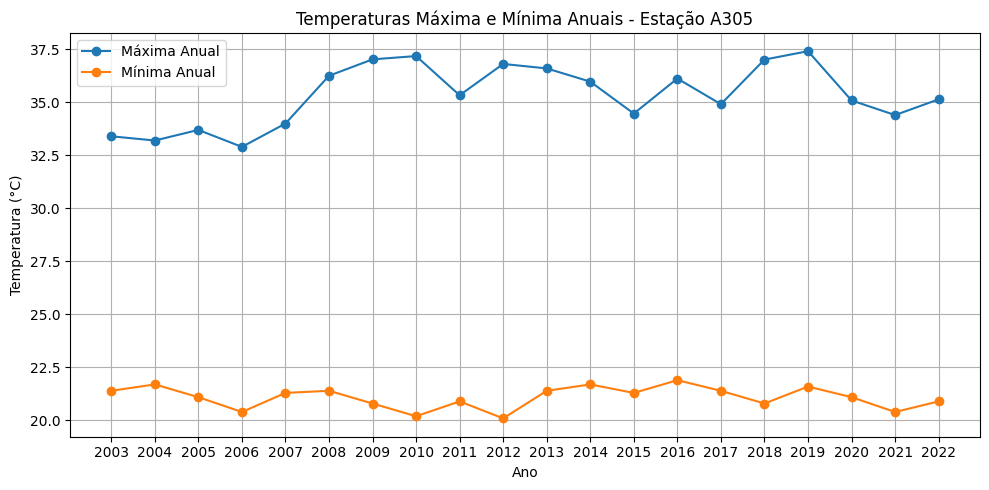

In [81]:
# Filtrar os dados apenas para a estação A305
dados_A305 = temperaturas[temperaturas['id_estacao'] == 'A305']

# Agrupar por ano e calcular a temperatura máxima e mínima anual
temperatura_anual = dados_A305.groupby('ano').agg(
    temperatura_max=('temperatura_max', 'max'),
    temperatura_min=('temperatura_min', 'min')
).reset_index()

# Plotar a série temporal anual
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_max'], label='Máxima Anual', marker='o')
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_min'], label='Mínima Anual', marker='o')

plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Anuais - Estação A305')
plt.xticks(range(temperatura_anual['ano'].min(), temperatura_anual['ano'].max() + 1))  # Define os ticks do eixo x para cada ano
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## Série temporal da vegetação na região de cada estação

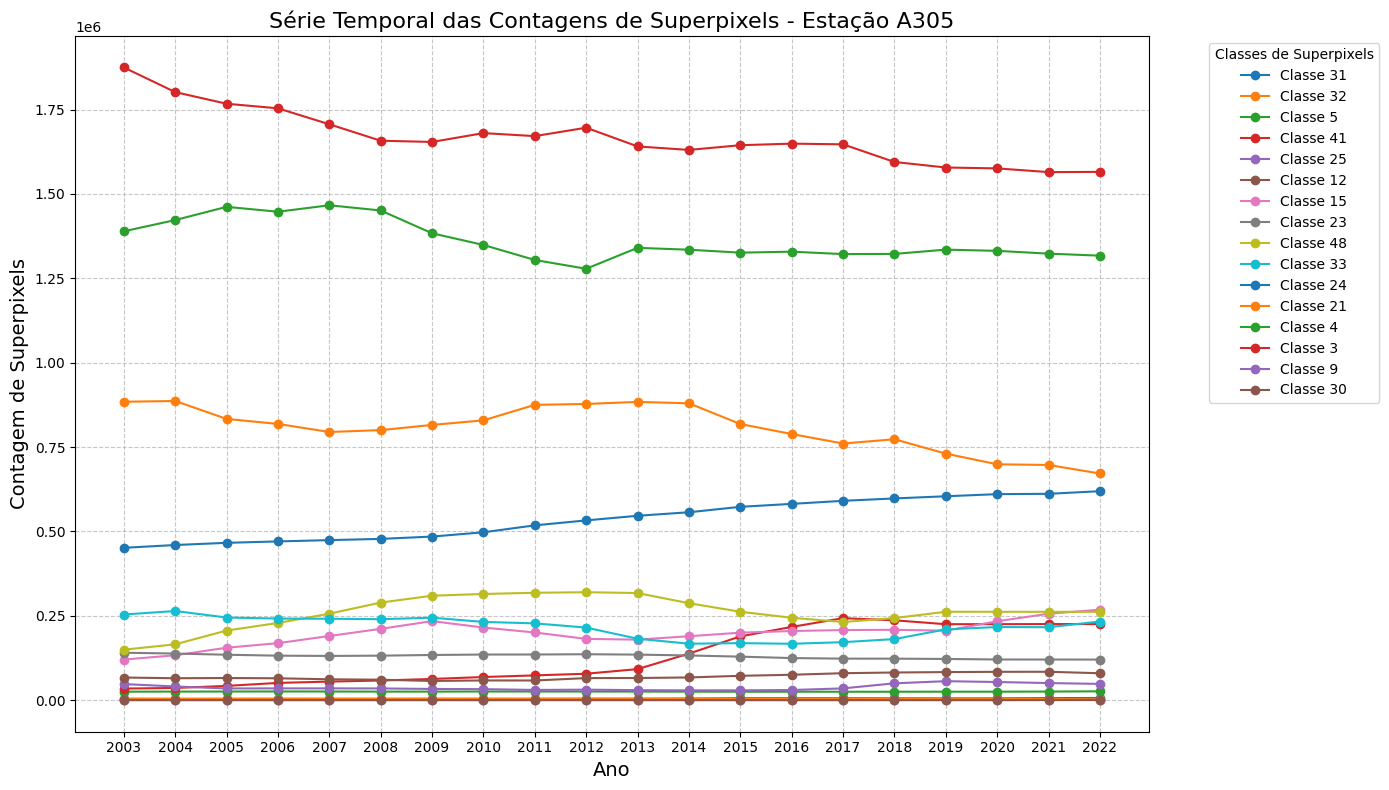

In [164]:
def plot_time_series(df_time_series, estacao_id):
    """
    Plotar a série temporal de contagem de superpixels por classe.

    Args:
    df_time_series (pd.DataFrame): DataFrame contendo a série temporal.
    estacao_id (str): ID da estação para o título do gráfico.
    """

    plt.figure(figsize=(14, 8))
    
    # Plotar cada classe de superpixel
    for class_id in df_time_series.columns:
        plt.plot(df_time_series.index, df_time_series[class_id], marker='o', label=f'Classe {class_id}')
    
    # Adicionar título e rótulos
    plt.title(f'Série Temporal das Contagens de Superpixels - Estação {estacao_id}', fontsize=16)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Contagem de Superpixels', fontsize=14)
    
    # Definir os ticks do eixo x para mostrar apenas anos inteiros
    plt.xticks(df_time_series.index, [str(int(year)) for year in df_time_series.index])
    
    # Adicionar uma grade
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionar a legenda fora do gráfico
    plt.legend(title='Classes de Superpixels', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar layout para evitar corte das legendas
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()

def create_time_series(output_base_dir, estacao_id, start_year, end_year):
    """
    Criar uma série temporal de contagem de superpixels por classe para uma estação específica,
    removendo IDs de classe com valor zero.

    Args:
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes foram salvos.
    estacao_id (str): ID da estação para criar a série temporal.
    start_year (int): Ano inicial da série temporal.
    end_year (int): Ano final da série temporal.

    Returns:
    pd.DataFrame: DataFrame contendo a série temporal.
    """

    # Criar um DataFrame para armazenar as contagens por ano
    time_series_data = {}

    for year in range(start_year, end_year + 1):
        tiff_path = os.path.join(output_base_dir, str(year), f'coverage_{estacao_id}_{year}.tif')

        if os.path.exists(tiff_path):
            sorted_class_counts = extract_classification_info(tiff_path)
            # Remover a entrada com ID de classe 0, se existir
            if 0 in sorted_class_counts:
                del sorted_class_counts[0]
            time_series_data[year] = sorted_class_counts
        else:
            print(f"Arquivo {tiff_path} não encontrado.")

    # Converter o dicionário em DataFrame
    df_time_series = pd.DataFrame(time_series_data).T.fillna(0)

    return df_time_series

# Definir parâmetros
output_base_dir = '../dados/raster_tiff_caating'
estacao_id = 'A305'
start_year = 2003
end_year = 2022

# Criar a série temporal
df_time_series = create_time_series(output_base_dir, estacao_id, start_year, end_year)
plot_time_series(df_time_series, estacao_id)

## Montagem do dataset para cada estação

In [165]:
def calcular_media_temperatura(dados, estacao_id):
    """
    Calcula a média anual das temperaturas máximas e mínimas para uma estação específica.

    Args:
    dados (pd.DataFrame): DataFrame contendo as colunas ['id_estacao', 'data', 'temperatura_max', 'temperatura_min', 'ano'].
    estacao_id (str): ID da estação para filtrar os dados.

    Returns:
    pd.DataFrame: DataFrame com a média anual das temperaturas.
    """
    # Filtrar os dados para a estação específica
    dados_estacao = dados[dados['id_estacao'] == estacao_id]

    # Agrupar por ano e calcular a média das temperaturas máxima e mínima
    temperatura_anual = dados_estacao.groupby('ano').agg(
        temperatura_max_median=('temperatura_max', 'median'),
        temperatura_min_median=('temperatura_min', 'median')
    ).reset_index()

    return temperatura_anual

def combinar_datasets(temperatura_anual, df_time_series):
    """
    Combina a média anual das temperaturas com a série temporal de contagem de superpixels.

    Args:
    temperatura_anual (pd.DataFrame): DataFrame com a média anual das temperaturas.
    df_time_series (pd.DataFrame): DataFrame contendo a série temporal de contagem de superpixels.

    Returns:
    pd.DataFrame: DataFrame combinado com as temperaturas e a contagem de superpixels por ano.
    """
    # Mesclar os dois DataFrames usando o ano como chave
    dataset_combinado = pd.merge(temperatura_anual, df_time_series, left_on='ano', right_index=True, how='inner')
    
    return dataset_combinado

# Função para criar o dataset completo para uma estação
def criar_dataset_completo(dados, output_base_dir, estacao_id, start_year, end_year):
    """
    Cria um dataset completo combinando as médias de temperatura e a contagem de superpixels.

    Args:
    dados (pd.DataFrame): DataFrame contendo as colunas ['id_estacao', 'data', 'temperatura_max', 'temperatura_min', 'ano'].
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes foram salvos.
    estacao_id (str): ID da estação para criar o dataset.
    start_year (int): Ano inicial da série temporal.
    end_year (int): Ano final da série temporal.

    Returns:
    pd.DataFrame: DataFrame completo com as temperaturas e a contagem de superpixels por ano.
    """
    # Calcular a média anual das temperaturas
    temperatura_anual = calcular_media_temperatura(dados, estacao_id)

    # Criar a série temporal de superpixels
    df_time_series = create_time_series(output_base_dir, estacao_id, start_year, end_year)

    # Combinar os datasets
    dataset_completo = combinar_datasets(temperatura_anual, df_time_series)

    return dataset_completo

In [166]:
output_base_dir = '../dados/raster_tiff_caating'
estacao_id = 'A305'
start_year = 2003
end_year = 2022

# DataFrame inicial com os dados de temperatura
dados_A305 = temperaturas[temperaturas['id_estacao'] == estacao_id]

# Criar o dataset completo para a estação A305
dataset_completo_A305 = criar_dataset_completo(dados_A305, output_base_dir, estacao_id, start_year, end_year)

In [167]:
dataset_completo_A305.head()

,ano,temperatura_max_median,temperatura_min_median,31,32,5,41,25,12,15,23,48,33,24,21,4,3,9,30
0,2003,28.900000,27.500000,2574.0,4683.0,24970.0,34098.0,47489.0,66877.0,120126.0,140382.0,149318.0,253628.0,451289.0,884053.0,1389258.0,1874707.0,0.0,0.0
1,2004,28.100000,26.900000,2761.0,4410.0,25162.0,35944.0,40349.0,64771.0,132801.0,137925.0,165220.0,263979.0,459531.0,886343.0,1422501.0,1801735.0,0.0,0.0
2,2005,27.700000,26.400000,3344.0,4303.0,25392.0,42089.0,34459.0,65402.0,155191.0,134406.0,206048.0,244677.0,466019.0,833253.0,1461676.0,1767177.0,0.0,0.0
3,2006,31.572132,26.477482,3677.0,4081.0,25559.0,50899.0,34696.0,64630.0,168667.0,131636.0,228522.0,241594.0,470223.0,818379.0,1447196.0,1753663.0,0.0,0.0
4,2007,27.500000,26.600000,3748.0,3909.0,25426.0,54823.0,34702.0,61626.0,189931.0,130868.0,256069.0,241064.0,474057.0,794502.0,1466322.0,1706385.0,0.0,0.0


# Utilizando o coeficiente de correlação de Pearson

In [168]:
# Dicionário de mapeamento de IDs para nomes das classes
id_to_class_name = {
    1: "Formação Florestal",
    3: "Formação Florestal",
    4: "Formação Savânica",
    5: "Mangue",
    6: "Floresta Alagável",
    49: "Restinga Arbórea",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre ",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    13: "Outras Formações Não Florestais",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    21: "Mosaico de Usos",
    46: "Café",
    47: "Citros",
    35: "Dendê (beta)",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    33: "Rio, Lago e Oceano ",
    31: "Aquicultura",
    27: "Não Observado",
    26: "Corpo d'água",
    22: "Área não Vegetada",
    10: "Formação Natural não Florestal",
    0: "Não Classificado",

}

Text(143.72222222222223, 0.5, 'Classes de Vegetação')

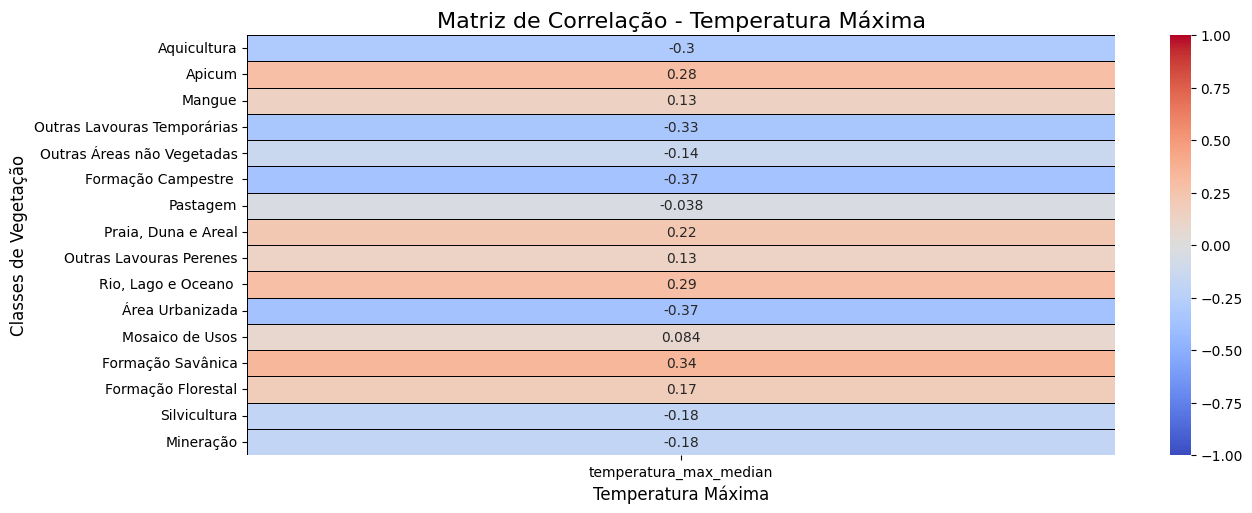

In [170]:
# Calcular a matriz de correlação para todas as colunas
correlation_matrix = dataset_completo_A305.corr(method='pearson')

# Focar apenas na correlação da temperatura máxima com as classes de vegetação
correlation_max = correlation_matrix[['temperatura_max_median']].drop(['ano', 'temperatura_max_median', 'temperatura_min_median'])

# Mapeando os nomes das classes no eixo y
correlation_max.index = correlation_max.index.map(id_to_class_name)

# Focar apenas na correlação da temperatura mínima com as classes de vegetação
correlation_min = correlation_matrix[['temperatura_min_median']].drop(['ano', 'temperatura_max_median', 'temperatura_min_median'])

# Mapeando os nomes das classes no eixo y
correlation_min.index = correlation_min.index.map(id_to_class_name)

# Configurar o tamanho do plot e criar duas subplots
plt.figure(figsize=(14, 12))

# Heatmap para Temperatura Máxima
plt.subplot(2, 1, 1)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlação - Temperatura Máxima', fontsize=16)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.ylabel('Classes de Vegetação', fontsize=12)

**Classes com Correlação Negativa:**
- **Outras lavouras Temporárias, Formação campestre, Área Urbanizada e Aquicultura:** Estas classes mostram uma correlação negativa moderada a forte (-0.33, -0.37, -0.3, respectivamente), sugerindo que à medida que as temperaturas máximas aumentam, a presença dessas classes diminui.

- **Outras Lavouras Temporárias:**
   - **Explicação:** Culturas temporárias, como milho, arroz e outras, são altamente dependentes de condições climáticas específicas. Um aumento nas temperaturas máximas pode causar estresse térmico nas plantas, reduzindo a produtividade e, portanto, a área cultivada. Além disso, o calor excessivo pode antecipar o ciclo de vida das plantas, levando a uma menor produção. O aumento das temperaturas também pode aumentar a evapotranspiração, exigindo mais irrigação, o que nem sempre é viável, especialmente em regiões que já enfrentam escassez hídrica 
   - **Fonte:** [Encyclopedia Britannica](https://www.britannica.com/science/savanna).

- **Formação Campestre:**
   - **Explicação:** As áreas de pastagem natural são vulneráveis a mudanças na temperatura, especialmente em regiões onde o aumento das temperaturas pode intensificar a secagem do solo e limitar a disponibilidade de água, essencial para a manutenção dessas áreas. Isso pode resultar em menor cobertura vegetal e maior degradação das pastagens.
   - **Fonte:** [Britannica sobre Formações Campestres](https://www.britannica.com/science/grassland).

- **Área Urbanizada:**
   - **Explicação:** Embora áreas urbanas não diminuam fisicamente, as condições de calor extremo podem tornar as cidades menos habitáveis, exacerbando os efeitos das ilhas de calor urbano. Isso pode levar a uma desaceleração na expansão urbana ou incentivar práticas de adaptação urbana, como o plantio de mais árvores e a criação de espaços verdes.
   - **Fonte:** [Artigo sobre Urbanização e Ilhas de Calor](https://www.epa.gov/heatislands).

- **Aquicultura:**
   - **Explicação:** A aquicultura é sensível às mudanças de temperatura na água, onde o aumento das temperaturas pode afetar a saúde dos organismos aquáticos, reduzir a produtividade e, em casos extremos, inviabilizar a continuidade da atividade em determinadas áreas. Isso leva a uma redução na área dedicada à aquicultura.
   - **Fonte:** [Artigo da FAO sobre Aquicultura e Mudanças Climáticas](http://www.fao.org/aquaculture/en/).


**Classes com Correlação Positiva:**
- **Formação Savânica, Rio, Lago e Oceano e Apicum:** Com correlações de 0.34, 0.29 e 0.28, respectivamente, essas áreas mostram uma tendência de aumento em contagem quando as temperaturas máximas são mais altas. Essa correlação positiva pode ser explicada por alguns fatores específicos para cada tipo de cobertura do solo.

 - **Formação Savânica:**
   - **Explicação:** As savanas são ecossistemas caracterizados por uma combinação de gramíneas e árvores dispersas, predominando em regiões tropicais e subtropicais. São altamente adaptadas a condições de calor extremo e variações sazonais de precipitação. O aumento das temperaturas máximas pode prolongar a estação seca e reduzir a disponibilidade de água, favorecendo as plantas resistentes ao fogo e à seca que compõem a savana. Isso pode resultar em uma expansão ou densificação dessas áreas durante períodos mais quentes 
   - **Fonte:** [Encyclopedia Britannica](https://www.britannica.com/science/savanna).

- **Rios, Lagos e Oceanos (River, Lake and Ocean):**
   - **Explicação:** A presença de corpos d'água como rios e lagos pode se expandir ou modificar com o aumento das temperaturas devido à evaporação e alterações no ciclo hidrológico. Em climas mais quentes, os corpos d'água podem aumentar temporariamente devido a eventos extremos de precipitação ou derretimento de gelo nas cabeceiras. Além disso, as mudanças climáticas podem influenciar diretamente a salinidade, a temperatura da água, e a evapotranspiração, afetando a distribuição e a extensão dessas massas de água 
   - **Fonte:** [C&F Stories Website](https://stories.climateandforests-undp.org/the-vital-role-of-african-savanna-landscapes-in-global-climate-action/index.html).

- **Apicum (Hypersaline Tidal Flat):**
   - **Explicação:** Apicuns são planícies de maré hipersalinas frequentemente encontradas em regiões costeiras. Essas áreas são extremamente sensíveis a mudanças nas condições climáticas, especialmente em relação à temperatura e à evaporação. O aumento das temperaturas pode intensificar a evaporação, aumentando a salinidade e favorecendo a expansão dessas áreas. Além disso, em climas mais quentes, a redução das chuvas pode limitar o influxo de água doce, intensificando ainda mais as condições hipersalinas 
   - **Fonte:** [Encyclopedia Britannica](https://www.britannica.com/science/savanna).

Text(143.72222222222223, 0.5, 'Classes de Vegetação')

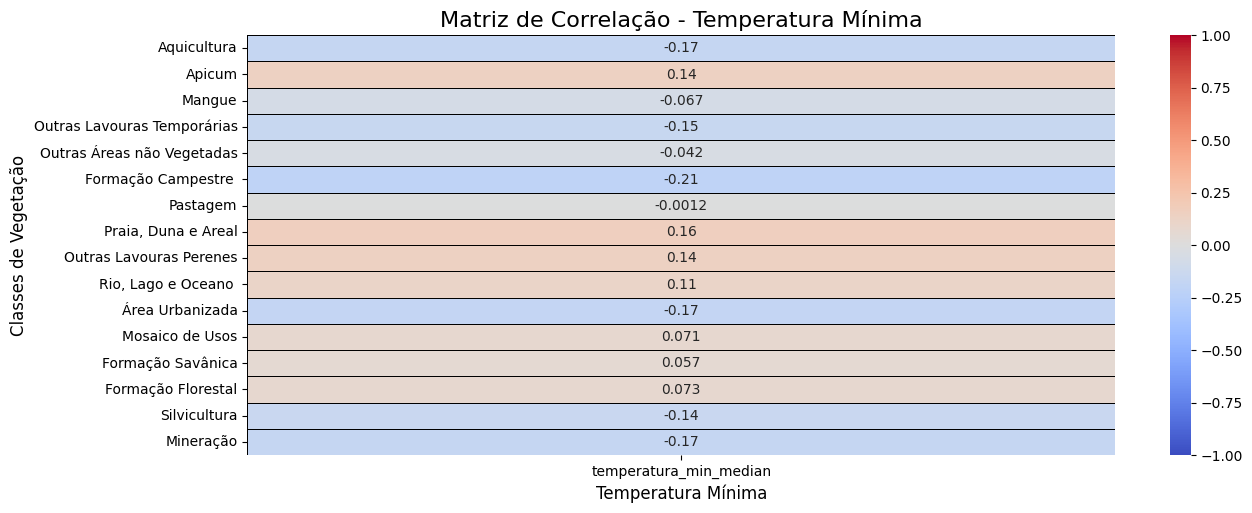

In [88]:
# Heatmap para Temperatura Mínima
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 2)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlação - Temperatura Mínima', fontsize=16)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.ylabel('Classes de Vegetação', fontsize=12)

# Verificando a correlação utilizando mais de uma estação

In [171]:
# Lista de IDs de estações
estacoes = ['A305', 'A306', 'A307', 'A308', 'A408', 'A412', 'A310', 'A309',
       'A313', 'A526', 'A539', 'A543', 'A314', 'A315', 'A316', 'A317',
       'A318', 'A319', 'A321', 'A322', 'A323', 'A324', 'A325', 'A327',
       'A329', 'A330', 'A331', 'A332', 'A333', 'A334', 'A336', 'A337',
       'A339', 'A340', 'A413', 'A415', 'A416', 'A417', 'A418', 'A419',
       'A420', 'A423', 'A424', 'A425', 'A426', 'A428', 'A429', 'A430',
       'A432', 'A433', 'A435', 'A436', 'A439', 'A440', 'A441', 'A442',
       'A443', 'A342', 'A349', 'A343', 'A328', 'A345', 'A347', 'A348',
       'A350', 'A351', 'A354', 'A358', 'A359', 'A360', 'A365', 'A366',
       'A367', 'A448', 'A450', 'A559', 'A563', 'A449', 'A454', 'A451',
       'A453', 'A370', 'A371', 'A372', 'A373', 'A368', 'A369', 'A458']


In [177]:
# Carregar o shapefile do Voronoi previamente salvo
gdf_voronoi_clipped = gpd.read_file('../dados/shapefile_estacoes_divididas/estacoes_territorios_dividido.shp')

# Removendo regiões com uma área muito grande em estacoes_validas
gdf_voronoi_validas_filter = gdf_voronoi_clipped[gdf_voronoi_clipped.area < 0.8]
gdf_voronoi_validas_filter.head()

C:\Users\arthu\AppData\Local\Temp\ipykernel_5408\370575154.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_voronoi_validas_filter = gdf_voronoi_clipped[gdf_voronoi_clipped.area < 0.8]


,id_estacao,latitude,longitude,geometry
0,A336,-8.441667,-43.865556,"MULTIPOLYGON (((-43.28134 -8.66269, -43.66635 ..."
2,A416,-13.332500,-44.617500,"MULTIPOLYGON (((-44.05675 -12.61621, -44.05717..."
4,A308,-3.086667,-41.783056,"POLYGON ((-41.5219 -3.55804, -41.52253 -3.5580..."
6,A539,-15.085958,-44.016036,"MULTIPOLYGON (((-43.82896 -15.61738, -44.27226..."
8,A526,-14.408333,-44.404167,"MULTIPOLYGON (((-44.446 -13.85756, -44.44638 -..."


In [ ]:
# Filtrar as estações meteorológicas para incluir apenas as estações válidas
stations_validas = stations_within_caatinga[stations_within_caatinga['id_estacao'].isin(gdf_voronoi_validas_filter['id_estacao'])]

# Plotar o resultado ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi para as estações válidas
gdf_voronoi_validas_filter.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar as estações meteorológicas válidas
stations_validas.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID das estações válidas no plot
for x, y, label in zip(stations_validas.geometry.x, stations_validas.geometry.y, stations_validas['id_estacao']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão das Estações Meteorológicas Válidas dentro da Caatinga')
plt.show()

In [175]:
# Lista para armazenar os DataFrames de cada estação
datasets_completos = []
output_base_dir = '../dados/raster_tiff_caating'
start_year = 2003
end_year = 2022

# Iterar sobre cada estação e criar o dataset completo
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Criar o dataset completo para a estação atual
    dataset_completo = criar_dataset_completo(temperaturas, output_base_dir, estacao_id, start_year, end_year)
    
    # Adicionar o ID da estação ao DataFrame
    dataset_completo['id_estacao'] = estacao_id
    
    # Adicionar o dataset da estação à lista
    datasets_completos.append(dataset_completo)

# Concatenar todos os DataFrames em um único DataFrame
dataset_completo_todas_estacoes = pd.concat(datasets_completos, ignore_index=True)

# Substituir valores NaN por 0
dataset_completo_todas_estacoes.fillna(0, inplace=True)

# Remover colunas onde todos os valores são 0
dataset_completo_todas_estacoes = dataset_completo_todas_estacoes.loc[:, (dataset_completo_todas_estacoes != 0).any(axis=0)]

# Exibir as primeiras linhas do DataFrame final
dataset_completo_todas_estacoes.head()

,ano,temperatura_max_median,temperatura_min_median,39,33,41,24,25,15,12,...,46,29,48,31,32,5,23,20,30,50
0,2007,33.2,27.22611,26.0,1268.0,1810.0,7346.0,46448.0,162724.0,134422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,27.5,25.70000,87.0,1268.0,1932.0,7440.0,44194.0,176902.0,133308.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,26.9,25.70000,2.0,1238.0,3698.0,7543.0,37061.0,200726.0,145177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,27.4,26.20000,0.0,1179.0,4500.0,7632.0,29335.0,196661.0,189262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,26.7,25.50000,0.0,1092.0,3680.0,7730.0,21856.0,204480.0,209070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
# quantos anos de dados temos para cada estação?
dataset_completo_todas_estacoes['id_estacao'].value_counts()

id_estacao
A308    20
A305    20
A309    19
A310    19
A313    17
A336    16
A416    16
A539    16
A526    16
A333    16
A329    16
A417    16
A334    16
A415    16
A322    16
A413    16
A321    16
A332    16
A323    16
A314    16
A327    16
A318    16
A340    16
A317    16
A339    16
A348    15
A328    15
A420    15
A428    15
A441    15
A345    15
A359    15
A436    15
A349    15
A442    15
A350    15
A419    15
A358    15
A360    14
A450     8
A559     7
A373     6
A453     6
A451     6
A370     6
A371     6
A372     6
A369     5
A458     5
Name: count, dtype: int64

In [95]:
dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == 'A369']

,ano,temperatura_max_median,temperatura_min_median,39,33,41,24,25,15,12,...,46,29,48,31,32,5,23,20,30,50
444,2018,26.800000,25.500000,0.0,67899.0,7369.0,15979.0,9151.0,762899.0,5755.0,...,0.0,0.0,21131.0,0.0,0.0,0.0,0.0,0.0,1315.0,0.0
445,2019,27.700000,26.000000,0.0,67016.0,8052.0,16579.0,8238.0,757964.0,9268.0,...,0.0,0.0,26178.0,0.0,0.0,0.0,0.0,0.0,1332.0,0.0
446,2020,34.166515,29.877737,0.0,66798.0,8136.0,16709.0,8201.0,748374.0,9387.0,...,0.0,0.0,26180.0,0.0,0.0,0.0,0.0,0.0,1345.0,0.0
447,2021,34.112133,27.976179,0.0,65542.0,8589.0,16789.0,8313.0,728633.0,9340.0,...,0.0,0.0,26184.0,0.0,0.0,0.0,0.0,0.0,1349.0,0.0
448,2022,34.837029,27.950159,0.0,68546.0,8597.0,17095.0,7434.0,730402.0,9365.0,...,0.0,0.0,26183.0,0.0,0.0,0.0,0.0,0.0,1354.0,0.0


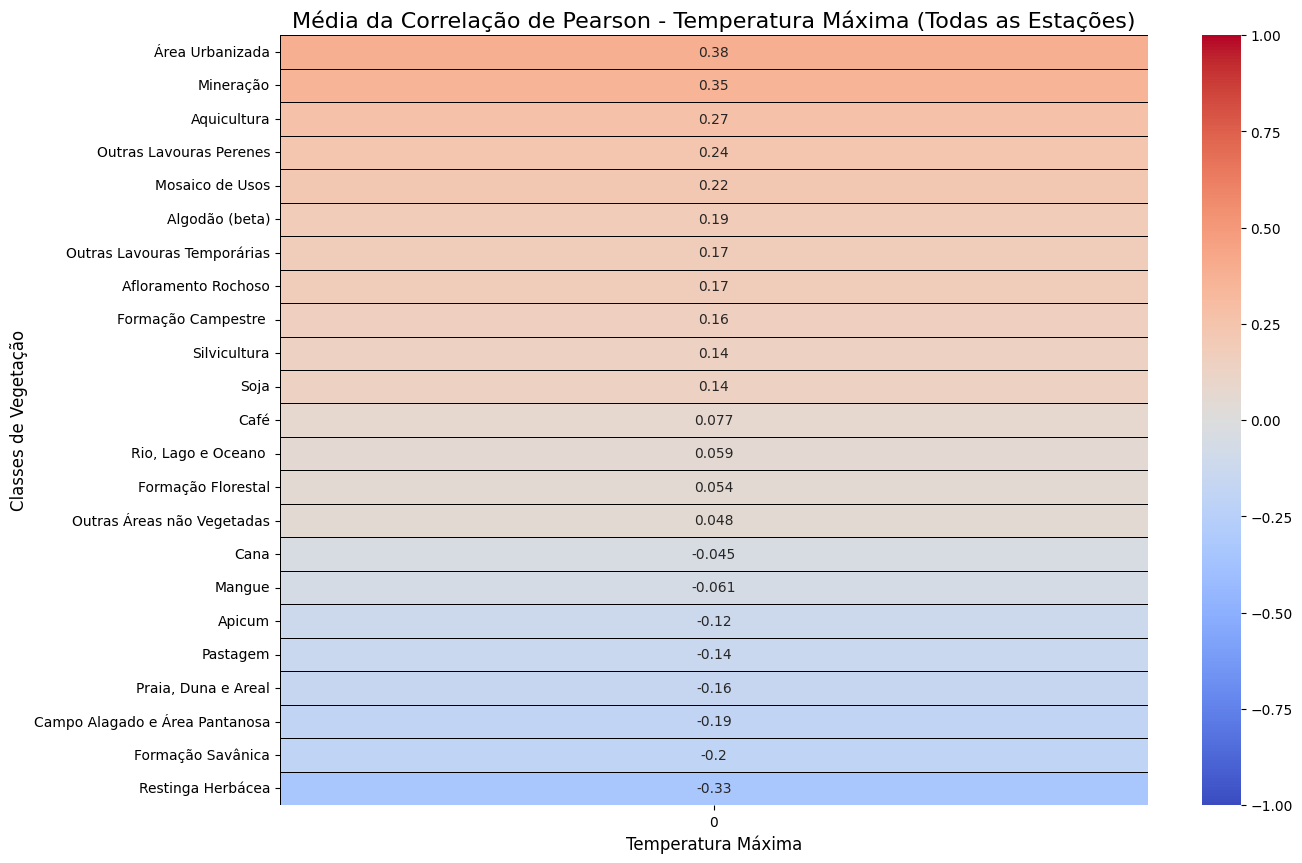

In [99]:
# Dicionário para armazenar as correlações de cada estação
correlacoes_por_estacao = {}

# Iterar por cada estação e calcular a correlação
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura máxima
    correlacao_temp_max = dados_para_correlacao.corr(method='pearson')['temperatura_max_median']
    
    # Remover a autocorrelação (correlação da temperatura máxima com ela mesma)
    correlacao_temp_max = correlacao_temp_max.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao[estacao_id] = correlacao_temp_max

# Combinar todas as correlações e calcular a média
correlacoes_media = pd.DataFrame(correlacoes_por_estacao).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media.index = correlacoes_media.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media = correlacoes_media.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura máxima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Máxima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.show()

- **Correlação Positiva:** Classes de vegetação como "Área Urbanizada", "Mineração" e "Aquicultura" apresentam uma correlação positiva mais forte com a temperatura máxima, indicando que, nessas áreas, um aumento na temperatura máxima está associado a uma maior prevalência dessas classes de vegetação. Isso é esperado, especialmente em áreas urbanizadas, onde as superfícies artificiais e a atividade humana geralmente levam a temperaturas mais altas (efeito de ilha de calor).
  
- **Correlação Negativa:** Classes como "Restinga Herbácea", "Formação Savânica", e "Campo Alagado e Área Pantanosa" apresentam correlação negativa, sugerindo que, à medida que a temperatura máxima aumenta, a prevalência dessas classes de vegetação tende a diminuir. Isso pode estar relacionado a áreas naturais que tendem a ter microclimas mais amenos ou a responder negativamente ao calor extremo.

### **Urbanização e Aumento da Temperatura:**
Áreas urbanizadas, como mostrado no topo do gráfico com correlação positiva, geralmente apresentam temperaturas mais altas em comparação com áreas rurais ou menos desenvolvidas. Este fenômeno é conhecido como ilha de calor urbano (UHI), onde superfícies urbanas, como concreto e asfalto, absorvem e retêm calor, elevando as temperaturas locais. A vegetação nessas áreas é frequentemente limitada, o que reduz a capacidade de resfriamento natural proporcionada pela evapotranspiração. Estudos indicam que as ilhas de calor urbano podem aumentar as temperaturas em áreas urbanas em até 2-5°C comparado às áreas circundantes [Frontiers](https://www.frontiersin.org/journals/plant-science/articles/10.3389/fpls.2022.861768/full), [MDPI](https://www.mdpi.com/2073-4433/15/2/161).

### **Efeito da Vegetação na Redução de UHI:**
Por outro lado, a vegetação desempenha um papel crucial na mitigação dos efeitos das ilhas de calor urbano. Áreas com alta cobertura vegetal tendem a ter uma correlação negativa com a temperatura máxima, como evidenciado pelas classes de vegetação como "Restinga Herbácea" e "Formação Savânica" no gráfico. A vegetação reduz a temperatura por meio de processos de sombreamento e evapotranspiração, que removem calor do ambiente. A pesquisa mostra que a cobertura vegetal pode reduzir a intensidade das ilhas de calor urbano, contribuindo para uma diminuição da temperatura de superfície em áreas verdes, o que pode ser essencial para o planejamento urbano sustentável [MDPI](https://www.mdpi.com/2073-4433/15/2/161), [Springer](https://link.springer.com/article/10.1007/s41324-016-0049-3).

### **Impactos Locais e Considerações Climáticas:**
A correlação variada entre diferentes classes de vegetação e a temperatura máxima também pode refletir variações locais nas práticas de uso do solo e no clima. Por exemplo, áreas de mineração e agricultura intensiva podem mostrar correlações positivas com a temperatura, pois a remoção da vegetação natural para essas atividades aumenta a exposição do solo, elevando as temperaturas. Em contraste, ecossistemas naturais como pântanos ou florestas, que mostram correlação negativa, ajudam a moderar as temperaturas locais devido à alta umidade e densidade vegetal [Springer](https://link.springer.com/article/10.1007/s41324-016-0049-3).

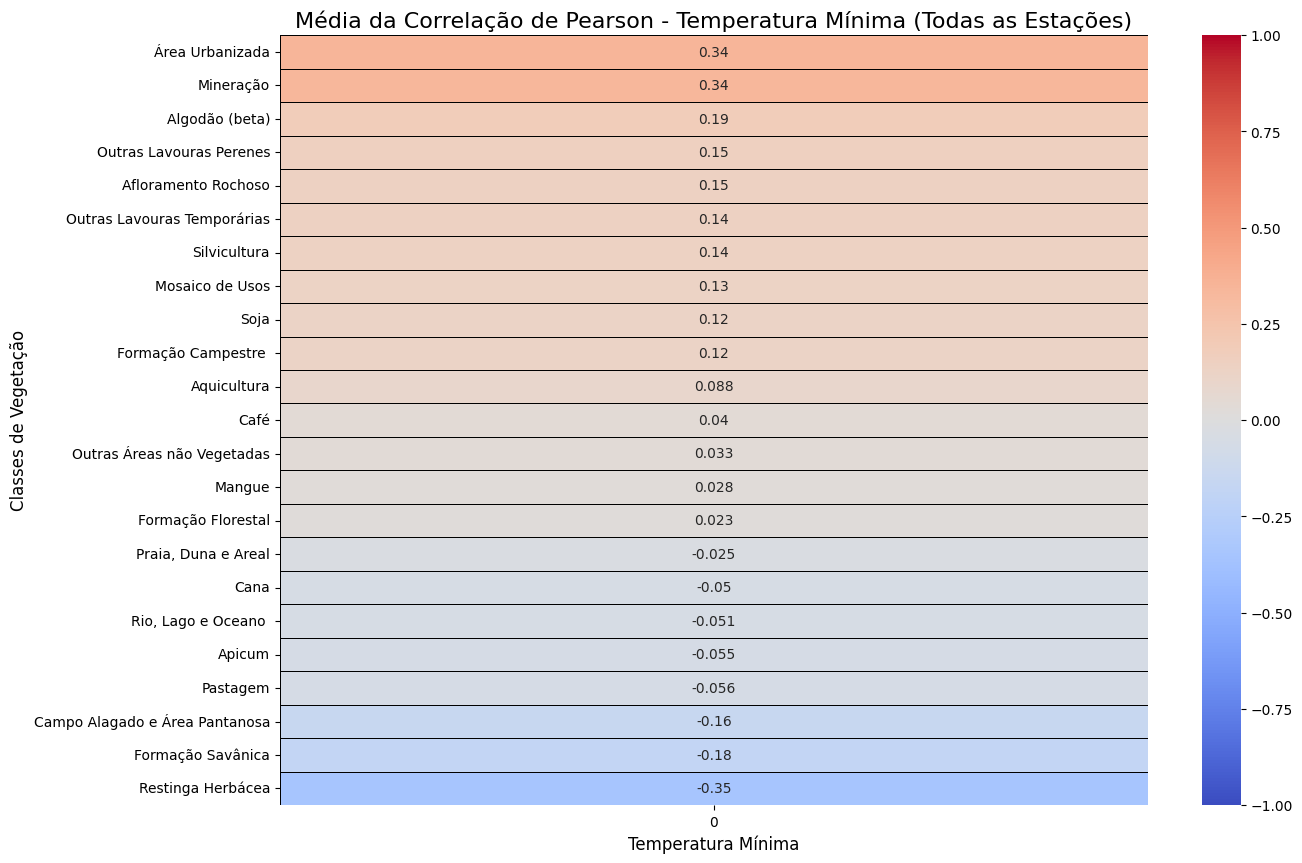

In [101]:
# Dicionário para armazenar as correlações de cada estação para temperatura mínima
correlacoes_por_estacao_min = {}

# Iterar por cada estação e calcular a correlação para a temperatura mínima
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura mínima
    correlacao_temp_min = dados_para_correlacao.corr(method='pearson')['temperatura_min_median']
    
    # Remover a autocorrelação (correlação da temperatura mínima com ela mesma)
    correlacao_temp_min = correlacao_temp_min.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao_min[estacao_id] = correlacao_temp_min

# Combinar todas as correlações e calcular a média
correlacoes_media_min = pd.DataFrame(correlacoes_por_estacao_min).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media_min.index = correlacoes_media_min.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media_min = correlacoes_media_min.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura mínima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media_min.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Mínima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.show()

### **Urbanização e Temperatura Mínima:**
Áreas urbanizadas e de mineração, no topo da lista com correlações positivas (0,34), novamente indicam um padrão bem estabelecido de ilhas de calor urbano. A correlação positiva sugere que em áreas urbanizadas, as temperaturas mínimas tendem a ser mais elevadas, comparadas a áreas menos desenvolvidas. Isso acontece porque as superfícies urbanas retêm calor durante o dia e liberam-no lentamente à noite, mantendo temperaturas mínimas mais elevadas. Este fenômeno é comum em áreas densamente povoadas, onde a falta de vegetação e a abundância de superfícies impermeáveis amplificam o efeito de calor residual durante a noite.

### **Vegetação e Resfriamento Noturno:**
No extremo oposto, as classes de vegetação como "Restinga Herbácea" e "Formação Savânica" apresentam correlações negativas, sugerindo que nessas áreas, as temperaturas mínimas são mais baixas. Isso reflete a capacidade das áreas naturais e vegetadas de liberar o calor mais rapidamente após o pôr do sol, promovendo um resfriamento noturno mais eficaz. A vegetação ajuda a dissipar o calor acumulado durante o dia, resultando em temperaturas noturnas mais amenas. Estudos indicam que áreas com vegetação densa, como florestas e pastagens, geralmente apresentam temperaturas mínimas mais baixas, contrastando com as áreas urbanizadas.

### **Impacto das Áreas Naturais:**
Áreas como "Campo Alagado e Área Pantanosa", "Formação Savânica", e "Restinga Herbácea", que mostram correlações negativas, indicam a influência significativa da vegetação e da presença de água no controle das temperaturas mínimas. Essas áreas tendem a resfriar mais durante a noite, o que é consistente com a maior capacidade de resfriamento das áreas vegetadas e úmidas. A evapotranspiração durante o dia também contribui para a redução do calor, criando um ambiente noturno mais fresco.


# Usando dados de temperatura de satélite

In [53]:
# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Convertendo em GeoDataFrame
gdf_caatinga = gpd.GeoDataFrame(geometry=[caatinga.unary_union], crs=caatinga.crs)

C:\Users\arthu\AppData\Local\Temp\ipykernel_5408\2916740094.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_caatinga = gpd.GeoDataFrame(geometry=[caatinga.unary_union], crs=caatinga.crs)


In [54]:
# Definir a área de interesse (AOI) como o envelope da Caatinga
aoi = gdf_caatinga.envelope

# Obter os limites da AOI
x_min, y_min, x_max, y_max = aoi.bounds.values[0]

# Gerar a malha de pontos com latitude e longitude no CRS EPSG:4674
# Usamos passos pequenos para gerar pontos (0.5 graus) 
x_coords = np.arange(x_min, x_max, 0.5)
y_coords = np.arange(y_min, y_max, 0.5)
points = [Point(x, y) for x in x_coords for y in y_coords]
grid_gdf = gpd.GeoDataFrame(points, columns=['geometry'], crs=gdf_caatinga.crs)

# Filtrar pontos que estão fora da área da Caatinga
grid_gdf = grid_gdf[grid_gdf.geometry.within(gdf_caatinga.unary_union)]

C:\Users\arthu\AppData\Local\Temp\ipykernel_5408\1524549068.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_gdf = grid_gdf[grid_gdf.geometry.within(gdf_caatinga.unary_union)]


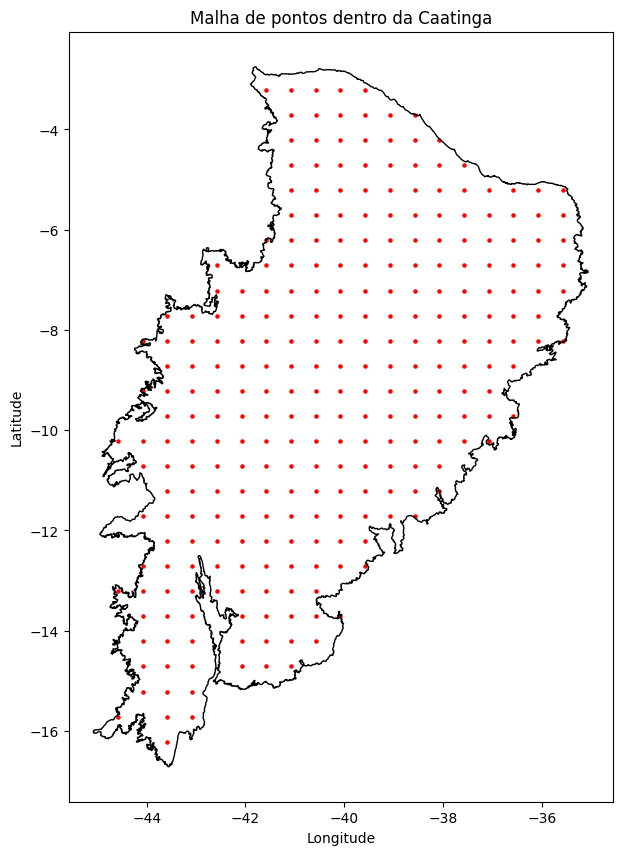

In [55]:
# Plotar a Caatinga e a malha de pontos
fig, ax = plt.subplots(figsize=(10, 10))
gdf_caatinga.boundary.plot(ax=ax, color='black', linewidth=1)
grid_gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Malha de pontos dentro da Caatinga')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Atribuir IDs únicos a cada ponto
grid_gdf['id'] = ['SAT' + str(i) for i in range(len(grid_gdf))]

# Adicionar pontos fictícios ao redor do perímetro da Caatinga
minx, miny, maxx, maxy = caatinga.total_bounds
padding = 0.5  # Ajuste conforme necessário
extra_points = [
    [minx - padding, miny - padding],
    [minx - padding, maxy + padding],
    [maxx + padding, miny - padding],
    [maxx + padding, maxy + padding]
]

# Adicionar os novos pontos às coordenadas das estações
extra_points_geom = [Point(x, y) for x, y in extra_points]
extra_gdf = gpd.GeoDataFrame(extra_points_geom, columns=['geometry'], crs=gdf_caatinga.crs)

# Concatenar os pontos fictícios ao GeoDataFrame original
all_points_gdf = pd.concat([grid_gdf, extra_gdf], ignore_index=True)

# Extraindo coordenadas para criação dos polígonos de Voronoi
coords = np.array(list(zip(all_points_gdf.geometry.x, all_points_gdf.geometry.y)))

# Gerar os polígonos de Voronoi
vor = Voronoi(coords)

# Criar polígonos de Voronoi a partir dos vértices
polygons = []
for region in vor.regions:
    if not -1 in region and region:
        polygon = Polygon([vor.vertices[i] for i in region])
        polygons.append(polygon)

# Criar um GeoDataFrame com os polígonos de Voronoi
gdf_voronoi = gpd.GeoDataFrame(geometry=polygons, crs=all_points_gdf.crs)

# Verificar e corrigir geometrias inválidas antes do clipping
gdf_voronoi['geometry'] = gdf_voronoi['geometry'].buffer(0)

# Clipping com o polígono da Caatinga para garantir que todos os polígonos estejam dentro da região
gdf_voronoi_clipped = gpd.GeoDataFrame(
    geometry=[poly.intersection(gdf_caatinga.unary_union) for poly in gdf_voronoi.geometry if not poly.is_empty],
    crs=gdf_voronoi.crs
)

# Remover geometrias vazias
gdf_voronoi_clipped = gdf_voronoi_clipped[~gdf_voronoi_clipped.is_empty]

In [57]:
# Associar o polígono ao ID da estação mais próxima
def find_nearest_station(polygon, stations):
    centroid = polygon.centroid
    distances = stations.geometry.apply(lambda x: centroid.distance(x))
    nearest_station = stations.loc[distances.idxmin()]
    return nearest_station['id']

# Aplicar a função para encontrar o ID da estação
gdf_voronoi_clipped['id'] = gdf_voronoi_clipped.geometry.apply(lambda poly: find_nearest_station(poly, grid_gdf))

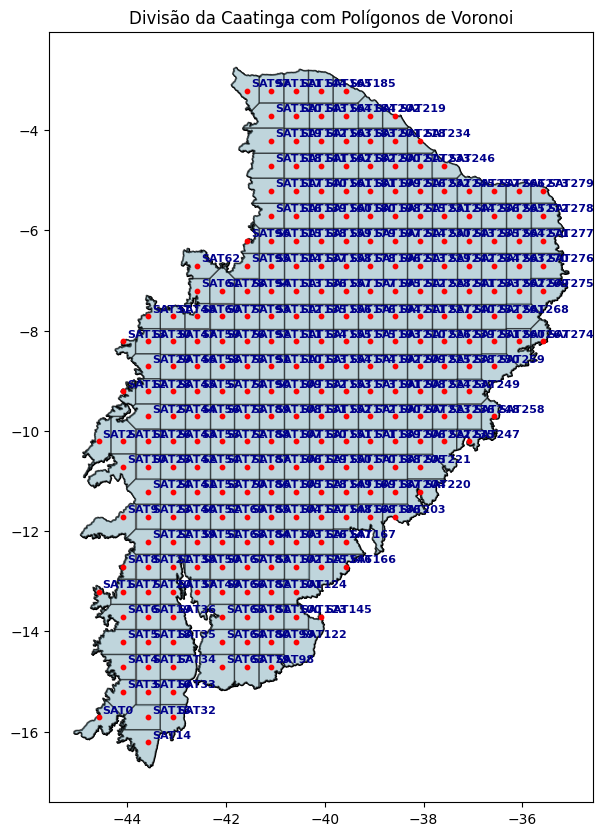

In [66]:
# Plotar o resultado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
gdf_caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi
gdf_voronoi_clipped.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar os pontos
grid_gdf.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID dos pontos no plot
for x, y, label in zip(grid_gdf.geometry.x, grid_gdf.geometry.y, grid_gdf['id']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão da Caatinga com Polígonos de Voronoi')
plt.show()

In [65]:
# salvar o shapefile resultante
gdf_voronoi_clipped.to_file('../dados/shapefile_estacoes_divididas/caatinga_territorios_dividido_SAT.shp')

# Recuperando informação de temperatura para cada estação

In [60]:
import ee
import pandas as pd

In [61]:
ee.Authenticate(force=True)
service_account = 'pdi-618@projetopdi-430718.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, '../dados/projetopdi-430718-5d4f0b0f6064.json')
ee.Initialize(credentials)


Successfully saved authorization token.


In [62]:
def get_modis_temperature_by_year_range(lat, lon, start_year, end_year):
    """
    Função para obter as temperaturas médias máximas e mínimas de superfície terrestre do MODIS para uma latitude, 
    longitude e intervalo de anos específico.
    
    Parâmetros:
    - lat (float): Latitude do local.
    - lon (float): Longitude do local.
    - start_year (int): Ano inicial do intervalo.
    - end_year (int): Ano final do intervalo.
    
    Retorna:
    - Lista de temperaturas médias máximas e mínimas de superfície terrestre em Celsius para cada ano no intervalo.
    """
    
    # Inicializar o ponto de interesse
    point = ee.Geometry.Point(lon, lat)
    
    # Definir datas de início e fim com base no intervalo de anos
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'
    
    # Coleção de dados MODIS de temperatura da superfície terrestre
    dataset = ee.ImageCollection('MODIS/061/MOD11A1') \
        .filterBounds(point) \
        .filterDate(start_date, end_date) \
        .select(['LST_Day_1km', 'LST_Night_1km'])
    
    # Verificar se imagens foram encontradas
    if dataset.size().getInfo() == 0:
        raise ValueError("Nenhuma imagem encontrada para o intervalo de anos e localização especificados.")
    
    # Lista para armazenar as temperaturas médias máximas e mínimas por ano
    temperaturas_anuais = []
    
    # Loop através dos anos no intervalo
    for year in range(start_year, end_year + 1):
        year_start = f'{year}-01-01'
        year_end = f'{year}-12-31'
        
        # Filtrar a coleção de dados para o ano específico
        year_images = dataset.filterDate(year_start, year_end)
        
        # Calcular as temperaturas médias diurna e noturna para o ano
        mean_temp_day_image = year_images.select('LST_Day_1km').median()
        mean_temp_night_image = year_images.select('LST_Night_1km').median()
        
        # Amostrar os valores das temperaturas no ponto de interesse
        try:
            temp_day_dict = mean_temp_day_image.sample(region=point, scale=1000).first().getInfo()
            temp_night_dict = mean_temp_night_image.sample(region=point, scale=1000).first().getInfo()
            
            if temp_day_dict is None or 'properties' not in temp_day_dict or temp_night_dict is None or 'properties' not in temp_night_dict:
                raise ValueError("Amostragem falhou ou não retornou dados válidos.")
            
            # Converter de Kelvin para Celsius
            temp_max_celsius = temp_day_dict['properties']['LST_Day_1km'] * 0.02 - 273.15
            temp_min_celsius = temp_night_dict['properties']['LST_Night_1km'] * 0.02 - 273.15
            
            temperaturas_anuais.append({'year': year, 'max_temperature': temp_max_celsius, 'min_temperature': temp_min_celsius})
        
        except Exception as e:
            raise ValueError(f"Erro ao obter temperatura para o ano {year}: {e}")
    
    return temperaturas_anuais

In [63]:
# Extraindo as coordenadas e IDs das estações
stations_df = grid_gdf[['id', 'geometry']].copy()
stations_df['latitude'] = stations_df.geometry.y
stations_df['longitude'] = stations_df.geometry.x

# Definir o intervalo de anos
start_year = 2003
end_year = 2022

# Inicializar uma lista para armazenar todos os dados de temperatura
all_temperatures = []

# Iterar sobre cada estação no dataframe
for index, station in stations_df.iterrows():
    lat = station['latitude']
    lon = station['longitude']
    id_estacao = station['id']
    
    try:
        # Obter as temperaturas para a estação atual
        temperaturas = get_modis_temperature_by_year_range(lat, lon, start_year, end_year)
        
        # Adicionar o ID da estação aos dados de temperatura
        for temp in temperaturas:
            temp['id_estacao'] = id_estacao
            temp['latitude'] = lat
            temp['longitude'] = lon
            all_temperatures.append(temp)
    
    except ValueError as e:
        print(f"Erro ao obter temperaturas para a estação {id_estacao}: {e}")

# Converter a lista de temperaturas para um DataFrame
temperature_df = pd.DataFrame(all_temperatures)

# Reorganizar colunas para melhor visualização
temperature_df = temperature_df[['id_estacao', 'year', 'latitude', 'longitude', 'max_temperature', 'min_temperature']]

# Exibir o DataFrame final
temperature_df.head()

,id_estacao,year,latitude,longitude,max_temperature,min_temperature
0,SAT0,2003,-15.712637,-44.578141,28.046000,19.590000
1,SAT0,2004,-15.712637,-44.578141,26.398571,18.550000
2,SAT0,2005,-15.712637,-44.578141,27.144444,19.555000
3,SAT0,2006,-15.712637,-44.578141,25.992500,18.613333
4,SAT0,2007,-15.712637,-44.578141,27.308000,19.345000


In [64]:
# salvar o dataframe
temperature_df.to_csv('../dados/temperaturas_estacoes_modis.csv', index=False)

# Separar os arquivos geotif por estação

In [70]:
def process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped):
    """
    Processa todos os arquivos GeoTIFF na pasta segmentacoes para todas as estações,
    salvando os resultados em pastas separadas por ano.

    Args:
    segmentacoes_dir (str): Caminho para a pasta contendo os arquivos GeoTIFF de entrada.
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes serão salvos.
    gdf_voronoi_clipped (GeoDataFrame): GeoDataFrame contendo os polígonos de Voronoi.
    """

    # Listar todos os arquivos GeoTIFF na pasta segmentacoes
    tiff_files = glob.glob(os.path.join(segmentacoes_dir, '*.tif'))

    # Obter os IDs únicos das estações
    estacao_ids = gdf_voronoi_clipped['id_estacao'].unique()

    for tiff_file in tiff_files:
        # Extrair o ano do nome do arquivo GeoTIFF
        year = os.path.basename(tiff_file).split('_')[-1].split('.')[0]

        # Criar diretório para o ano se não existir
        year_dir = os.path.join(output_base_dir, year)
        os.makedirs(year_dir, exist_ok=True)

        for estacao_id in estacao_ids:
            # Aplicar a função para salvar o TIFF mascarado
            save_masked_tiff(tiff_file, estacao_id, year_dir, gdf_voronoi_clipped)
            print(f"Salvo: {year_dir}/coverage_{estacao_id}_{year}.tif")


# Definir caminhos
segmentacoes_dir = '../dados/segmentacoes'
output_base_dir = '../dados/raster_tiff_caating_sat'

# Executar o processamento para todos os arquivos e estações
process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped)

Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT144_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT121_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT13_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT11_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT2_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT12_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT165_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT14_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT35_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT153_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT132_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT5_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT18_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT0_2003.tif
Salvo: ../dados/raster_tiff_caat

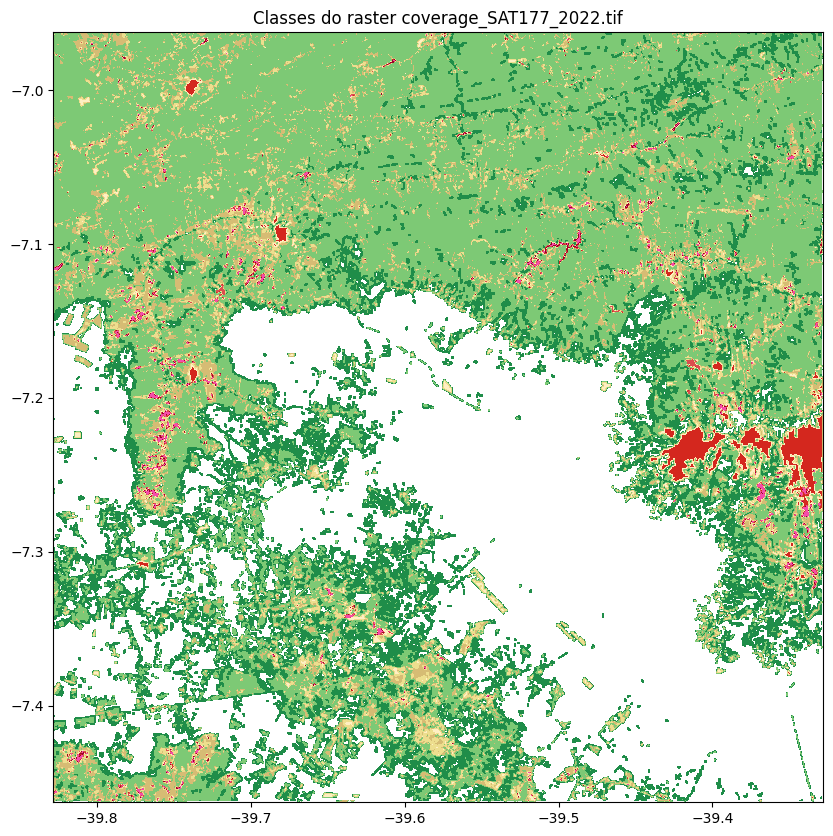

In [148]:
output_tif_path = '../dados/raster_tiff_caating_sat/2022/coverage_SAT177_2022.tif'
plot_tiff_with_classes(output_tif_path)

In [149]:
# Extrair informações do GeoTIFF salvo
sorted_class_counts = extract_classification_info(output_tif_path)

# Exibir as classificações e contagens
print("Contagem de superpixels por classe (ordenado):", sorted_class_counts)

Contagem de superpixels por classe (ordenado): {np.uint8(30): np.int64(1338), np.uint8(25): np.int64(3320), np.uint8(33): np.int64(4915), np.uint8(0): np.int64(7424), np.uint8(41): np.int64(21121), np.uint8(12): np.int64(27223), np.uint8(24): np.int64(42642), np.uint8(21): np.int64(123141), np.uint8(15): np.int64(269771), np.uint8(4): np.int64(1410352), np.uint8(3): np.int64(1537202)}


# Montagem do dataset para cada estação

In [178]:
# Carregar o shapefile do Voronoi previamente salvo
gdf_voronoi_clipped = gpd.read_file('../dados/shapefile_estacoes_divididas/caatinga_territorios_dividido_SAT.shp')
gdf_voronoi_clipped.rename(columns={'id': 'id_estacao'}, inplace=True)
gdf_voronoi_clipped.head()

,id_estacao,geometry
0,SAT144,"POLYGON ((-40.32814 -3.46264, -40.82814 -3.462..."
1,SAT121,"POLYGON ((-40.82814 -3.46264, -41.32814 -3.462..."
2,SAT13,"POLYGON ((-43.91258 -8.54708, -43.91273 -8.547..."
3,SAT11,"MULTIPOLYGON (((-44.32814 -9.72916, -44.32813 ..."
4,SAT2,"MULTIPOLYGON (((-44.32814 -9.71264, -44.32814 ..."


In [179]:
# abrir o arquivo CSV com as temperaturas
temperature_df = pd.read_csv('../dados/temperaturas_estacoes_modis.csv')
# alterar nome max_temperature para temperatura_max e min_temperature para temperatura_min
temperature_df.rename(columns={'max_temperature': 'temperatura_max', 'min_temperature': 'temperatura_min', 'year': 'ano'}, inplace=True)
temperature_df.head()

,id_estacao,ano,latitude,longitude,temperatura_max,temperatura_min
0,SAT0,2003,-15.712637,-44.578141,28.046000,19.590000
1,SAT0,2004,-15.712637,-44.578141,26.398571,18.550000
2,SAT0,2005,-15.712637,-44.578141,27.144444,19.555000
3,SAT0,2006,-15.712637,-44.578141,25.992500,18.613333
4,SAT0,2007,-15.712637,-44.578141,27.308000,19.345000


In [193]:
# Lista para armazenar os DataFrames de cada estação
datasets_completos = []
output_base_dir = '../dados/raster_tiff_caating_sat'
start_year = 2003
end_year = 2022

# Iterar sobre cada estação e criar o dataset completo
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Criar o dataset completo para a estação atual
    dataset_completo = criar_dataset_completo(temperature_df, output_base_dir, estacao_id, start_year, end_year)
    
    # Adicionar o ID da estação ao DataFrame
    dataset_completo['id_estacao'] = estacao_id
    
    # Adicionar o dataset da estação à lista
    datasets_completos.append(dataset_completo)

# Concatenar todos os DataFrames em um único DataFrame
dataset_completo_todas_estacoes = pd.concat(datasets_completos, ignore_index=True)

# Substituir valores NaN por 0
dataset_completo_todas_estacoes.fillna(0, inplace=True)

# Remover colunas onde todos os valores são 0
dataset_completo_todas_estacoes = dataset_completo_todas_estacoes.loc[:, (dataset_completo_todas_estacoes != 0).any(axis=0)]

# Exibir as primeiras linhas do DataFrame final
dataset_completo_todas_estacoes.head()

,ano,temperatura_max_median,temperatura_min_median,41,12,31,24,32,25,5,...,39,62,29,46,11,9,20,49,50,13
0,2003,30.938,23.140000,782.0,1015.0,5748.0,6090.0,13199.0,24262.0,44307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,30.710,23.300000,739.0,1095.0,5889.0,6236.0,13400.0,22710.0,44468.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,35.570,23.700000,7.0,908.0,5883.0,6598.0,13387.0,22402.0,44625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,31.055,23.240000,0.0,695.0,5917.0,6842.0,13444.0,23569.0,44735.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,32.840,23.463333,0.0,993.0,6035.0,7180.0,13387.0,26257.0,44743.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# quantos anos de dados temos para cada estação?
dataset_completo_todas_estacoes['id_estacao'].value_counts()

id_estacao
SAT93     20
SAT144    20
SAT121    20
SAT13     20
SAT11     20
          ..
SAT18     20
SAT5      20
SAT132    20
SAT153    20
SAT35     20
Name: count, Length: 280, dtype: int64

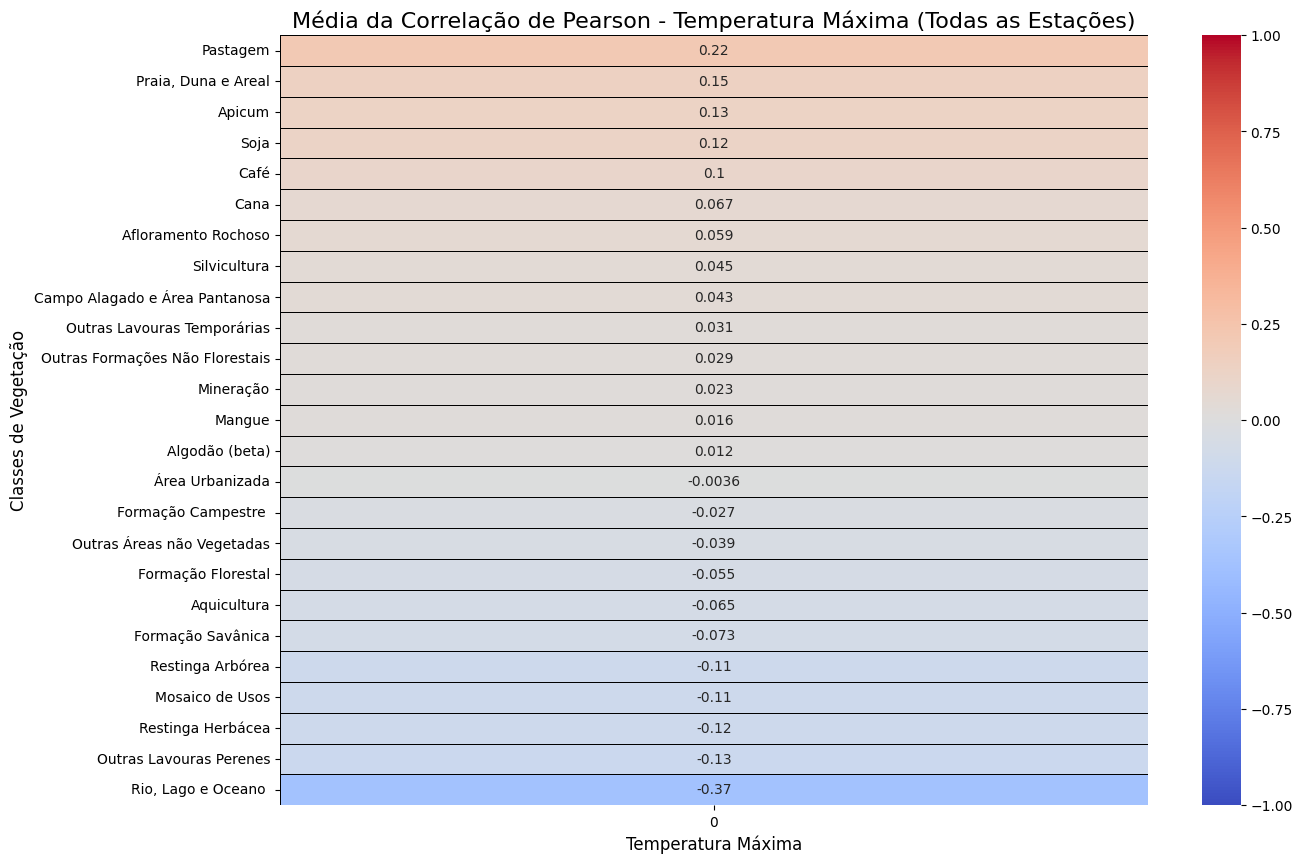

In [198]:
# Dicionário para armazenar as correlações de cada estação
correlacoes_por_estacao = {}

# Iterar por cada estação e calcular a correlação
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura máxima
    correlacao_temp_max = dados_para_correlacao.corr(method='pearson')['temperatura_max_median']
    
    # Remover a autocorrelação (correlação da temperatura máxima com ela mesma)
    correlacao_temp_max = correlacao_temp_max.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao[estacao_id] = correlacao_temp_max

# Combinar todas as correlações e calcular a média
correlacoes_media = pd.DataFrame(correlacoes_por_estacao).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media.index = correlacoes_media.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media = correlacoes_media.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura máxima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Máxima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.show()

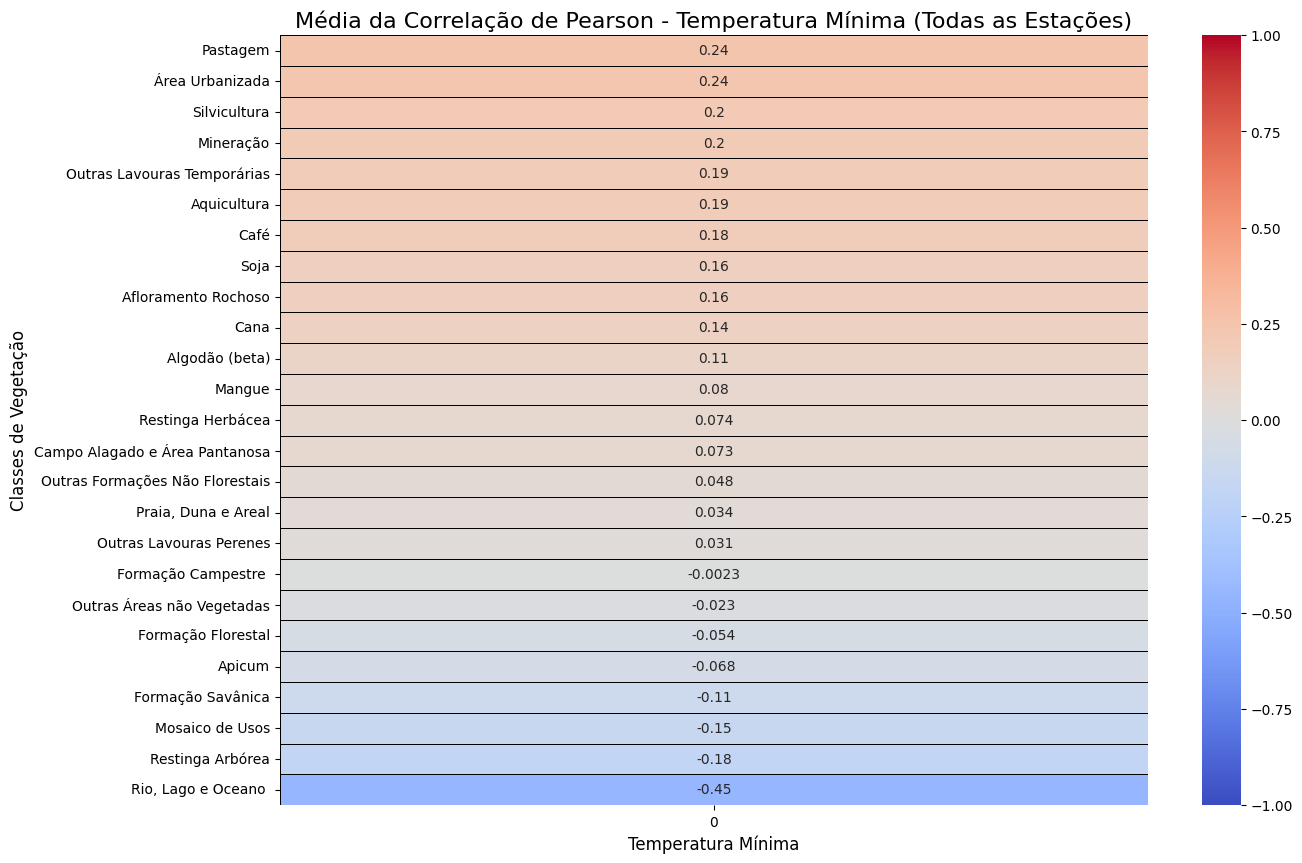

In [199]:
# Dicionário para armazenar as correlações de cada estação para temperatura mínima
correlacoes_por_estacao_min = {}

# Iterar por cada estação e calcular a correlação para a temperatura mínima
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura mínima
    correlacao_temp_min = dados_para_correlacao.corr(method='pearson')['temperatura_min_median']
    
    # Remover a autocorrelação (correlação da temperatura mínima com ela mesma)
    correlacao_temp_min = correlacao_temp_min.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao_min[estacao_id] = correlacao_temp_min

# Combinar todas as correlações e calcular a média
correlacoes_media_min = pd.DataFrame(correlacoes_por_estacao_min).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media_min.index = correlacoes_media_min.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media_min = correlacoes_media_min.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura mínima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media_min.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Mínima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.show()

# Modelagem Preditiva

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [201]:
# Supondo que a variável alvo seja temperatura_max_median
X = dataset_completo_todas_estacoes.drop(columns=['temperatura_max_median', 'temperatura_min_median','ano','id_estacao'])
y = dataset_completo_todas_estacoes['temperatura_max_median']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definindo o modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definindo os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [300,400,500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Definindo o GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=2, verbose=1)

# Treinando o modelo com GridSearch
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Previsões
y_pred = best_model.predict(X_test_scaled)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores Parâmetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
MAE: 1.4139670462649419
R²: 0.6593417454331874
